# Quiz

## Statement

Given a vector of $\mathbb{R}^n$ of target values $\bar{a}$ and a trial vector $\bar{x}$. Find an univocal test (expressible in a programming language) to check:

 1. At least one coordinate $x_i = a_i$ (disjunction, `or`);
 1. All coordinates $x_i = a_i$ (conjunction, `and`);
 
With the restriction to not resort to:
 
 - boolean operators `and`, `or` and `xor`;
 - bit-shift operators `>>`, `<<`;
 
Basic arithemic operators are allowed (`add`, `sub`, `mul`, `div`).
 
The test must be expressed in a single statement.

Numbers are of type `float` and the test must also work for `integer` as well.

## Requirements

We chose `Python3+` language to solve this problem.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
#import matplotlib.tri as mtri
%matplotlib inline

Because we are working with float we must deal with Machine Precision which is about:

In [2]:
eps = np.finfo(np.float64).eps
eps

2.220446049250313e-16

Where $\varepsilon$ is a positive quantity, as small as we want.

## Proposal

We claim this problem can be tackled with multidimensional polynoms and $\delta-\varepsilon$ approach, the latter is left to the reader.

### Disjunction

Having at least one coordinate equal to its target is a disjunction and can be rewriten in the form of a product of squared differences:

$$\bigvee\limits_{i=1}^{n}(x_i=a_i)\equiv\top \implies p_\vee(\bar{x},\bar{a}) = \prod\limits_{i=1}^{n}(x_i - a_i)^2 < \varepsilon$$

In this case, at least one term tends to zero and so does the product.

This is equivalent to say the given coordinate is a root of multiplicity two of the multidimensional monom of order $2n$.



In [3]:
def p_vee(x, a):
    return np.prod(np.square(np.array(x)-np.array(a)))

In [4]:
def c_vee(x, a, tol=eps):
    return p_vee(x, a) < eps

#### 2D Equivalence

The origin shifted 2D equivalence is the following surface:

$$p(x,y) = x^2 \cdot y^2$$

Which renders as follow:

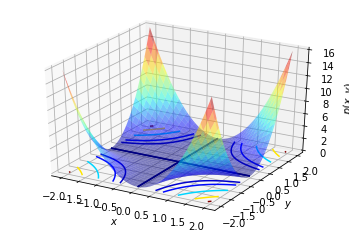

In [5]:
t = np.linspace(-2, 2, 101)
X, Y = np.meshgrid(t, t)
Z = X*X*Y*Y
axe = plt.axes(projection='3d')
axe.plot_surface(X, Y, Z, cmap='jet', alpha=0.5)
axe.contour(X, Y, Z, offset=0, levels=[0,1,2,5,10,15], zdir='z', cmap='jet')
axe.set_xlabel(r'$x$')
axe.set_ylabel(r'$y$')
_ = axe.set_zlabel(r'$p(x,y)$')

Where solutions of $p(x,y) = 0$ are $Ox$ and $Oy$ axes.

### Conjunction

Having all coordinates equal to targets is conjunction and be rewriten in the form of a sum of squared differences:

$$\bigwedge\limits_{i=1}^{n}(x_i=a_i)\equiv\top \implies p_\wedge(\bar{x},\bar{a}) = \sum\limits_{i=1}^{n}(x_i - a_i)^2 < \varepsilon$$

In this case, all monoms must tend to zero to make the sum tends to zero.

This is equivalent to say the coordinate is a root of multiplicity two of a multimendsional polynom of odrer $2$. This is a quadratic form, the hypersurface it is convex and $a$ is the global minimum.

This is also equivalent to say the coordinate must be null with respect to the origin translation $a$.

In [6]:
def p_wedge(x, a):
    return np.sum(np.square(np.array(x)-np.array(a)))

In [7]:
def c_wedge(x, a, tol=eps):
    return p_wedge(x, a) < eps

#### 2D Equivalence

The origin shifted 2D equivalence is the following surface:

$$p(x,y) = x^2 + y^2$$

Which renders as follow:

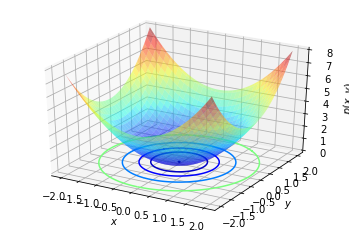

In [8]:
t = np.linspace(-2, 2, 101)
X, Y = np.meshgrid(t, t)
Z = X*X+Y*Y
axe = plt.axes(projection='3d')
axe.plot_surface(X, Y, Z, cmap='jet', alpha=0.5)
axe.contour(X, Y, Z, offset=0, levels=[1e-3,0.5,1,2,4,8], zdir='z', cmap='jet')
axe.set_xlabel(r'$x$')
axe.set_ylabel(r'$y$')
_ = axe.set_zlabel(r'$p(x,y)$')

Where solution of $p(x,y) = 0$ is origin $O$.

## Conclusions

 - There is an intersting analogy between boolean arithmetic and analytical geometry.
 - It amusing to see operators commute: conjunction becomes a sum and disjunction a product in geometry, it is the converse in boolean arithmetic.
 - Polynoms are great tools to tackle problems, they are easy to study and well implemented in many modern language.
 - Quadratics are your friends, use them whenver you can: lot of intersting properties, they behave well.

## Unit Test Cases